In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json

In [19]:
d = {"Angular": 0, "ASP.NET Core": 0, "Gatsby": 0, "Vue.js": 0, "React.js": 0}
with open("../../../data/analysis/patterns_first_data_point.json") as patterns_json:
    patterns = json.load(patterns_json)
    for pattern in patterns:
        for project in pattern["projects"]:
            if project["days"] != -1:
                d[project["name"]] += 1

d2 = {"Angular": 0, "ASP.NET Core": 0, "Gatsby": 0, "Vue.js": 0, "React.js": 0}
with open("../../../data/analysis/patterns_last_data_point.json") as patterns_json:
    patterns = json.load(patterns_json)
    for pattern in patterns:
        for project in pattern["projects"]:
            if project["days"] != -1:
                d2[project["name"]] += 1

data = []
for p in d:
    data.append({"name": p, "count": d[p], "time": "First Data Point Available"})
for p in d2:
    data.append({"name": p, "count": d2[p], "time": "Data Point at 30th of April 2021"})
    
df = pd.DataFrame(data={'count': [record["count"] for record in data], 'projects': [record["name"] for record in data], 'time': [record["time"] for record in data]})

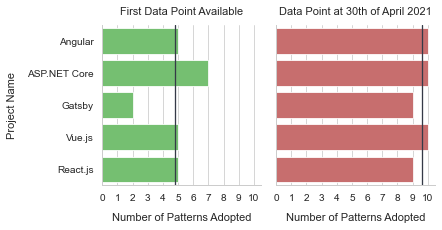

In [25]:
sns.set(context="paper", palette="muted", style="whitegrid", font='sans-serif', font_scale=1.15)

g = sns.FacetGrid(df, col="time", hue="time",
                     col_wrap=2, palette=["g", "r"])

def vertical_mean_line(x, **kwargs):
    plt.axvline(x.mean(), **kwargs)
    
g.map(vertical_mean_line, 'count', linewidth=1.3, color="#353a47")

g.map_dataframe(sns.barplot, x="count", y="projects")
g.set_axis_labels("Number of Patterns Adopted", "Project Name")
g.set_titles(col_template="{col_name}", pad=10)

for ax in g.axes:
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.set(xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    

g.savefig(f'../../../figures/pattern_adoption/overall_pattern_adoption_per_project.pdf', format='pdf', bbox_inches="tight")